In [1]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"

--2025-10-20 12:17:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv.1’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-20 12:17:02 (74.9 MB/s) - ‘course_lead_scoring.csv.1’ saved [80876/80876]



In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("course_lead_scoring.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [5]:
df.head(5)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1281.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108,0.619015
std,1.449717,15070.140389,1.681564,0.288465,0.485795
min,0.000000,13929.000000,0.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500,0.000000
50%,2.000000,60148.000000,3.000000,0.510000,1.000000
75%,3.000000,69639.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [7]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [8]:
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)

In [9]:
categorical

['lead_source', 'industry', 'employment_status', 'location']

In [10]:
numerical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [11]:
for col in categorical:
    df[col] = df[col].fillna("NA")

for col in numerical:
    df[col] = df[col].fillna(0)

In [12]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [13]:
for col in categorical:
    print(df[col].value_counts())

lead_source
organic_search    282
social_media      278
paid_ads          264
referral          260
events            250
NA                128
Name: count, dtype: int64
industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64
employment_status
self_employed    352
student          348
unemployed       334
employed         328
NA               100
Name: count, dtype: int64
location
north_america    225
europe           216
middle_east      198
asia             195
south_america    192
africa           188
australia        185
NA                63
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
len(df_train), len(df_val), len(df_test), len(df)

(876, 293, 293, 1462)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train["converted"].values
y_val = df_val["converted"].values
y_test = df_test["converted"].values

del df_train["converted"]
del df_val["converted"]
del df_test["converted"]

In [18]:
numerical.remove("converted")

### Question 1

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    print(f"{col}: {auc}")

number_of_courses_viewed: 0.7635680590007088
annual_income: 0.5519578313253012
interaction_count: 0.738270176293409
lead_score: 0.6144993577250176


### Question 2

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [22]:
dv = DictVectorizer(sparse=False)
dicts = df_train.to_dict(orient="records")
X_train = dv.fit_transform(dicts)

model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=10000)
model.fit(X_train, y_train)

dicts_val = df_val.to_dict(orient="records")
X_val = dv.transform(dicts_val)

y_pred = model.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred), 3)

0.92

### Question 3

In [23]:
actual_pos = y_val == 1
actual_neg = y_val == 0

precision = []
recall = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    predict_pos = y_pred >= t
    predict_neg = y_pred < t

    tp = sum(predict_pos & actual_pos)
    fp = sum(predict_pos & actual_neg)
    fn = sum(predict_neg & actual_pos)
    tn = sum(predict_neg & actual_neg)

    precision.append(tp / (tp + fp))
    recall.append(tp / (tp + fn))

/tmp/ipykernel_77722/2468928640.py:18: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp / (tp + fp))


In [24]:
import matplotlib.pyplot as plt

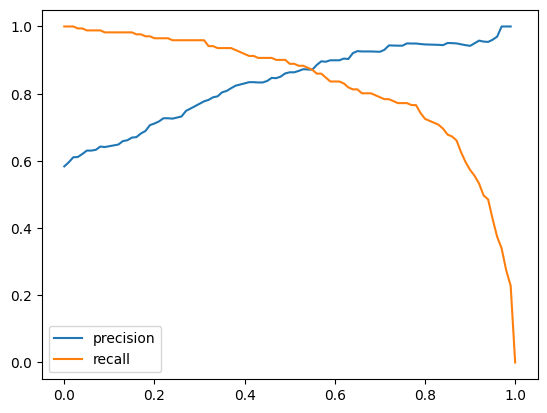

In [25]:
plt.plot(thresholds, precision, label="precision")
plt.plot(thresholds, recall, label="recall")
plt.legend()

In [26]:
precision[53:56]

[np.float64(0.8728323699421965),
 np.float64(0.872093023255814),
 np.float64(0.8713450292397661)]

In [27]:
recall[53:56]

[np.float64(0.8830409356725146),
 np.float64(0.8771929824561403),
 np.float64(0.8713450292397661)]

### Question 4

In [28]:
t_max = 0
F1_max = 0
for t, p, r in zip(thresholds, precision, recall):
    F1 = 2 * (p * r) / (p + r)
    if F1 > F1_max:
        t_max = t
        F1_max = F1

print(f"F1 is maximal at the threshold {t_max} (F1 = {F1_max})")
    

F1 is maximal at the threshold 0.49 (F1 = 0.8799999999999999)


### Question 5

In [29]:
from sklearn.model_selection import KFold

In [30]:
def train(df_train, y_train, C):
    dicts = df_train.to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [31]:
def predict(df, dv, model):
    dicts = df.to_dict(orient="records")

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [32]:
n_splits = 5

scores = []

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train["converted"].values
    y_val = df_val["converted"].values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    scores.append(roc_auc_score(y_val, y_pred))

print(f"std = {np.std(scores):3f}")

std = 0.031779


### Question 6

In [33]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train["converted"].values
        y_val = df_val["converted"].values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        scores.append(roc_auc_score(y_val, y_pred))
    
    print(f"C = {C}: {np.mean(scores):3f} +- {np.std(scores):3f}")

C = 1e-06: 0.560889 +- 0.023828
C = 0.001: 0.926121 +- 0.018329
C = 1: 0.875748 +- 0.031779
